In [164]:
import numpy as np                              #for numerical operations  
import matplotlib.pyplot as plt                 #for data visualisation
from sklearn.linear_model import ElasticNet      #import lasso from  scikit learn

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')

## Linear Datapoints

In [165]:
sample_size = 100                                 #Sample size
x = 2*np.random.rand(sample_size,1)               #generate sample data for x                        
y = 4 + 3*x + np.random.rand(sample_size, 1)      #generate sample data for y
x_b = np.c_[np.ones((sample_size,1)), x]          #add bias X0 = 1

In [166]:
def fit_and_plot(alpha, l1_penalty, n_iteration):
    theta = np.random.rand(x_b.shape[1],1)                                                  #Initialize the random theta value
    eta = 0.0005                                                                            # learning rate eta is 0.0005
    for i in range(n_iteration):                                                            #Iterate over number of iterations                
        gradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y)                           #Calculate gradient
        + alpha * theta                                                                     #adding L2_regularization term
        + l1_penalty * np.sign(theta)                                                       #adding L1_regularization term
        theta -= eta * gradient                                                             # calculate next theta
        y_predict = x_b.dot(theta)                                                          #predict value
        if i % 2500 == 0:                                                                   # predict value using new theta
            plt.scatter(x, y_predict, label=f"epoch :{i}")
            plt.xlabel('x-axis')                               
            plt.ylabel('y-axis')                               
            plt.title(r"$\alpha_{L2} = $" +f'{alpha}'+" | "+ r"$\alpha_{L1} = $" +f'{l1_penalty}')  #define plot title                                                  
    plt.scatter(x, y, label = 'Dataset', marker='+', c = 'black')       
    plt.legend()                               
    print(f"l2_Regularized term: {alpha} | Final epoch theta: {theta[0], theta[1]}")
    print(f"l1_Regularized term:{l1_penalty}| Final epoch theta: {theta[0], theta[1]}")
    print("---------------------------------------------------------------------------------------------------------------------")

l2_Regularized term: 0 | Final epoch theta: (array([4.30806638]), array([3.16489963]))
l1_Regularized term:1| Final epoch theta: (array([4.30806638]), array([3.16489963]))
---------------------------------------------------------------------------------------------------------------------
l2_Regularized term: 0.001 | Final epoch theta: (array([4.33758366]), array([3.13897765]))
l1_Regularized term:0.1| Final epoch theta: (array([4.33758366]), array([3.13897765]))
---------------------------------------------------------------------------------------------------------------------
l2_Regularized term: 0.1 | Final epoch theta: (array([4.33972377]), array([3.13709821]))
l1_Regularized term:0.001| Final epoch theta: (array([4.33972377]), array([3.13709821]))
---------------------------------------------------------------------------------------------------------------------
l2_Regularized term: 1 | Final epoch theta: (array([4.3221941]), array([3.15249272]))
l1_Regularized term:0| Final epo

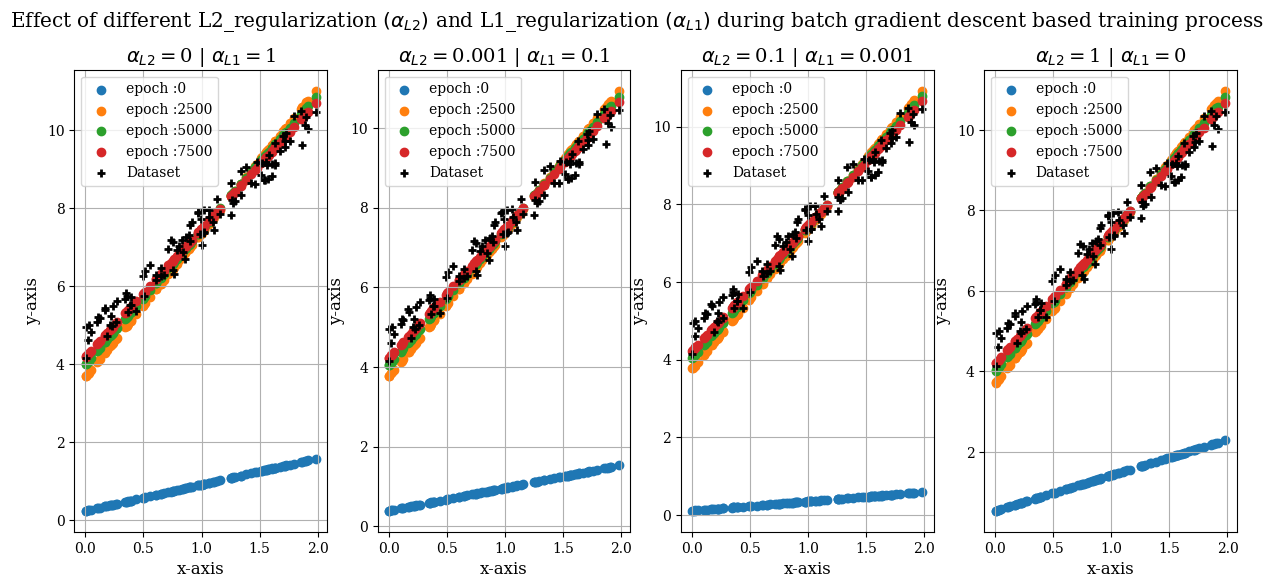

In [167]:
plt.figure(figsize=[15,6])              #define figure size
alpha_list = [0, 0.001, 0.1, 1]         #list of different l2 regularized parameter
l1_penalty_list = [1, 0.1, 0.001, 0]    #list of different l1 regularized parameter 

for i in range(1, 5):
    plt.subplot(1, 4, i)
    fit_and_plot(alpha_list[i-1], l1_penalty_list[i-1], 10000)
    plt.grid()
    plt.suptitle(r"Effect of different L2_regularization $(\alpha_{L2})$ and L1_regularization $(\alpha_{L1})$ during batch gradient descent based training process")

## Quadratic datapoints

In [168]:
sample_size = 100                                        #define sample size
degree_poly = 2                                          #Order of poly = 2  
x = 6 * np.random.rand(sample_size, 1) - 3
y = 0.5 * x**2 + x + 2 +np.random.randn(sample_size, 1)
x_b = np.c_[np.ones((sample_size, 1)), x, x**2]          #add bias x0 = 1

In [169]:
def fit_and_plot(alpha, l1_penalty, n_iteration):
    theta = np.random.rand(x_b.shape[1],1)                                                  #Initialize the random theta value
    eta = 0.0005                                                                            # learning rate eta is 0.0005
    for i in range(n_iteration):                                                            #iterate over number of iterations
        gradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y)                           #calculate gradient        
        + alpha * theta                                                                     #adding l2_regularization
        + l1_penalty * np.sign(theta)                                                       #adding l1_regularization
        theta -= eta * gradient                                                             # calculate next theta
        y_predict = x_b.dot(theta)                                                          # predict value 
        if i % 2500 == 0:                                                                   
            plt.scatter(x, y_predict, label=f"epoch :{i}")                                                      
            plt.xlabel('x-axis')                                                                    #axis name
            plt.ylabel('y-axis')                                                                    #axis name
            plt.title(r"$\alpha_{L2} = $" +f'{alpha}'+" | "+ r"$\alpha_{L1} = $" +f'{l1_penalty}')  #define plot title                                                  
    plt.scatter(x, y, label = 'Dataset', marker='+', c = 'black')       
    plt.legend()                               
    print(f"l2_Regularized term: {alpha} | Final epoch theta: {theta[0], theta[1], theta[2]}")
    print(f"l1_Regularized term:{l1_penalty}| Final epoch theta: {theta[0], theta[1], theta[2]}")
    print("---------------------------------------------------------------------------------------------------------------------")

l2_Regularized term: 0 | Final epoch theta: (array([1.98079163]), array([1.03886465]), array([0.47068894]))
l1_Regularized term:1| Final epoch theta: (array([1.98079163]), array([1.03886465]), array([0.47068894]))
---------------------------------------------------------------------------------------------------------------------
l2_Regularized term: 0.001 | Final epoch theta: (array([1.98174294]), array([1.03885745]), array([0.47049299]))
l1_Regularized term:0.1| Final epoch theta: (array([1.98174294]), array([1.03885745]), array([0.47049299]))
---------------------------------------------------------------------------------------------------------------------
l2_Regularized term: 0.1 | Final epoch theta: (array([1.97725297]), array([1.03889145]), array([0.47141784]))
l1_Regularized term:0.001| Final epoch theta: (array([1.97725297]), array([1.03889145]), array([0.47141784]))
--------------------------------------------------------------------------------------------------------------

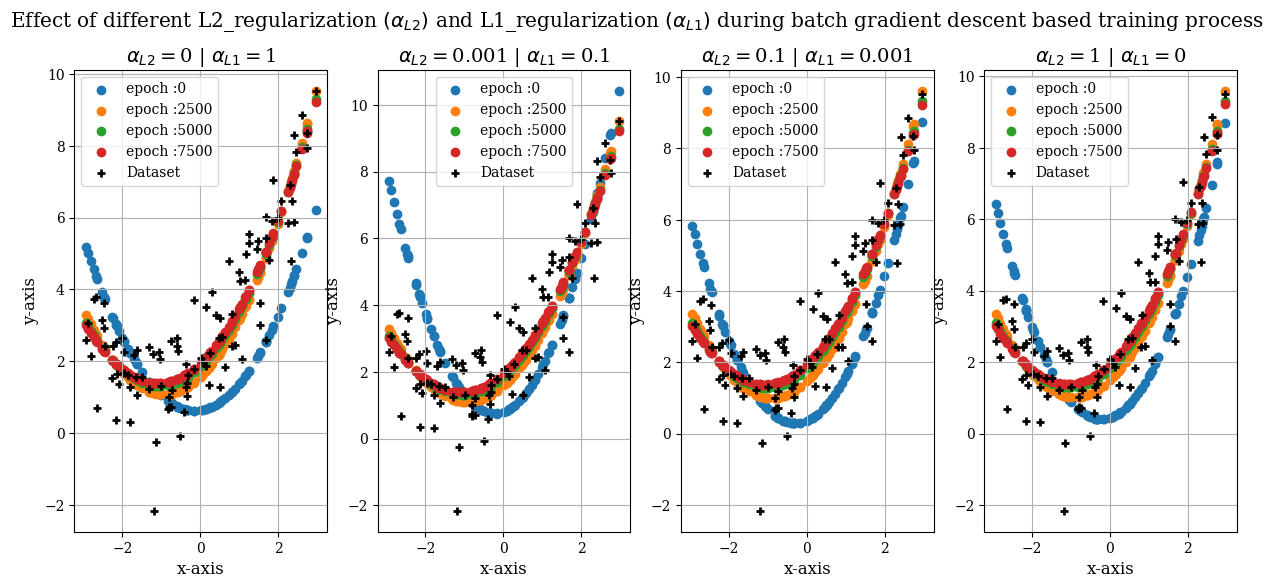

In [170]:
plt.figure(figsize=[15,6])              #define figure size
alpha_list = [0, 0.001, 0.1, 1]         #list of different l2 regularized parameter
l1_penalty_list = [1, 0.1, 0.001, 0]    #list of different l1 regularized parameter 

for i in range(1, 5):
    plt.subplot(1, 4, i)
    fit_and_plot(alpha_list[i-1], l1_penalty_list[i-1], 10000)
    plt.grid()
    plt.suptitle(r"Effect of different L2_regularization $(\alpha_{L2})$ and L1_regularization $(\alpha_{L1})$ during batch gradient descent based training process")

In [174]:
# from sklearn.linear_model import ElasticNet
# model = ElasticNet(alpha = 0.1, l1_ratio=0.01)
# model.fit(x_b, y)
# model.intercept_, model.coef_ 